<a href="https://colab.research.google.com/github/jstoetz/chatgpt-forecast/blob/main/Using_Chat_GPT_Advanced_Data_Analysis_to_Forecast_Future_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This is a follow-up from a [tweet I posted](https://x.com/jstoetz/status/1712555420181840323?s=20) about using Chat-GPT's Advanced Data Analysis tool to model and forecast time-series data.

* The complete chat on [Chat GPT](https://chat.openai.com/share/3e4fae6a-7239-4ef1-a811-b0d9047662ad).
* [Link](https://www.dropbox.com/scl/fi/zgy0muuf5gf7xuxztf9vj/AA_D.csv?rlkey=fxfils1e5tlacy8gw2fblfp2g&dl=0) to a `csv` file of the AA daily OHLC data.

What follows is the prompt, code and response for the following models:

* ARIMA
* Multiple Linear Regression
* LSTM
* Autoregression
* Moving Average
* SARIMAX
* Prophet

I have tried to keep the code in the original form output by Chat-GPT, but there are some changes to correct errors and change the file paths.



### Supported Models

As of October 2023, Chat-GPT supports the following machine learning models.

### Supervised Learning:

#### 1. Regression Algorithms:

* Linear Regression
* Polynomial Regression
* Ridge Regression
* Lasso Regression
* ElasticNet
* Support Vector Regression (SVR)
* Decision Trees for Regression
* Random Forest for Regression
* Gradient Boosting Machines for Regression (e.g., XGBoost, LightGBM, CatBoost)

#### 2. Classification Algorithms:

* Logistic Regression
* k-Nearest Neighbors (k-NN)
* Support Vector Machines (SVM)
* Decision Trees for Classification
* Random Forest for Classification
* Gradient Boosting Machines for Classification (e.g., XGBoost, LightGBM, CatBoost)
* Naive Bayes (e.g., Gaussian NB, Multinomial NB)
* Neural Networks (e.g., Feedforward, CNN, RNN)
* Ensemble methods (e.g., Bagging, Boosting, Stacking)

### Unsupervised Learning:

#### 1. Clustering:

* k-Means Clustering
* Hierarchical Clustering
* DBSCAN
* Gaussian Mixture Models (GMM)

#### 2. Dimensionality Reduction:

* Principal Component Analysis (PCA)
* Linear Discriminant Analysis (LDA)
* t-SNE (t-distributed Stochastic Neighbor Embedding)

### Time Series Analysis:

#### 1. Time Series Forecasting:

* ARIMA
* SARIMAX
* State Space Models
* Prophet
* Long Short-Term Memory (LSTM) networks

#### 2. Anomaly Detection:

* Isolation Forest
* One-Class SVM
* Local Outlier Factor (LOF)
* Autoencoders

### Reinforcement Learning:

#### 1. Reinforcement Learning Algorithms:

* Q-Learning
* Deep Q Networks (DQN)
* Policy Gradient Methods
* Actor-Critic Methods

### Others:

#### 1. Optimization Algorithms:

* Gradient Descent
* Genetic Algorithms
* Simulated Annealing

#### 2. Recommendation Systems:

* Collaborative Filtering
* Content-Based Filtering
* Matrix Factorization (e.g., SVD, NMF)
* Hybrid Methods

#### 3. Natural Language Processing (NLP):

* Text Classification
* Sentiment Analysis
* Named Entity Recognition
* Transformers (e.g., BERT, GPT)

This list is by no means exhaustive, and there are many specialized algorithms and variants not mentioned. If you have a specific model or approach in mind, feel free to ask, and I'll do my best to assist you!







## ARIMA Model

The origninal prompt `Read the attached dataset on the stock AA. Plot and forecast the close 10 days after the last row of data.` resulted in the system using an ARIMA model.

The code below is recreated from the output of Chat-GPT's Advanced Data Analysis.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/AA_D.csv')

# Display the first few rows of the dataset
df.head()


,Date,Open,High,Low,Close,Volume
0,2016-11-01,22.10,23.5500,21.7800,23.00,32220953
1,2016-11-02,22.67,23.2650,22.6358,22.91,10755328
2,2016-11-03,22.96,24.3493,22.9400,24.15,8084230
3,2016-11-04,23.82,25.5000,23.5600,25.20,6878720
4,2016-11-07,25.54,26.4100,24.8900,25.08,8377025


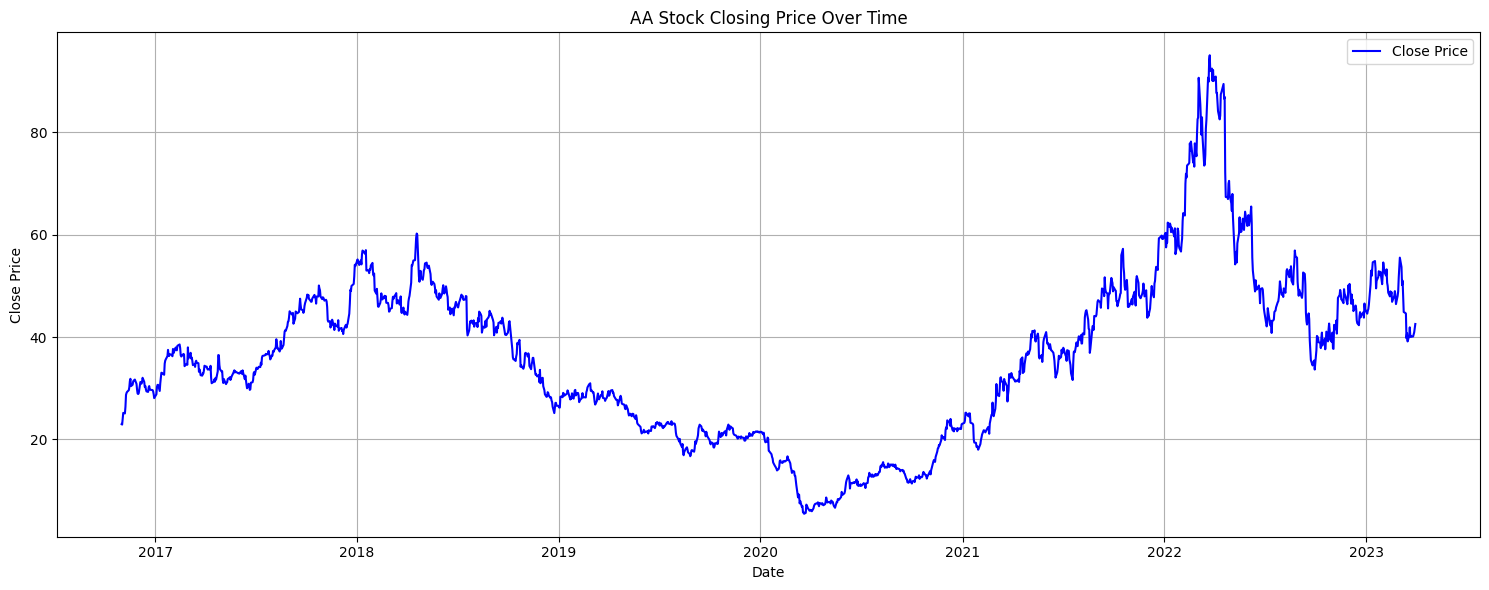

In [2]:
import matplotlib.pyplot as plt

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot the closing prices
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('AA Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


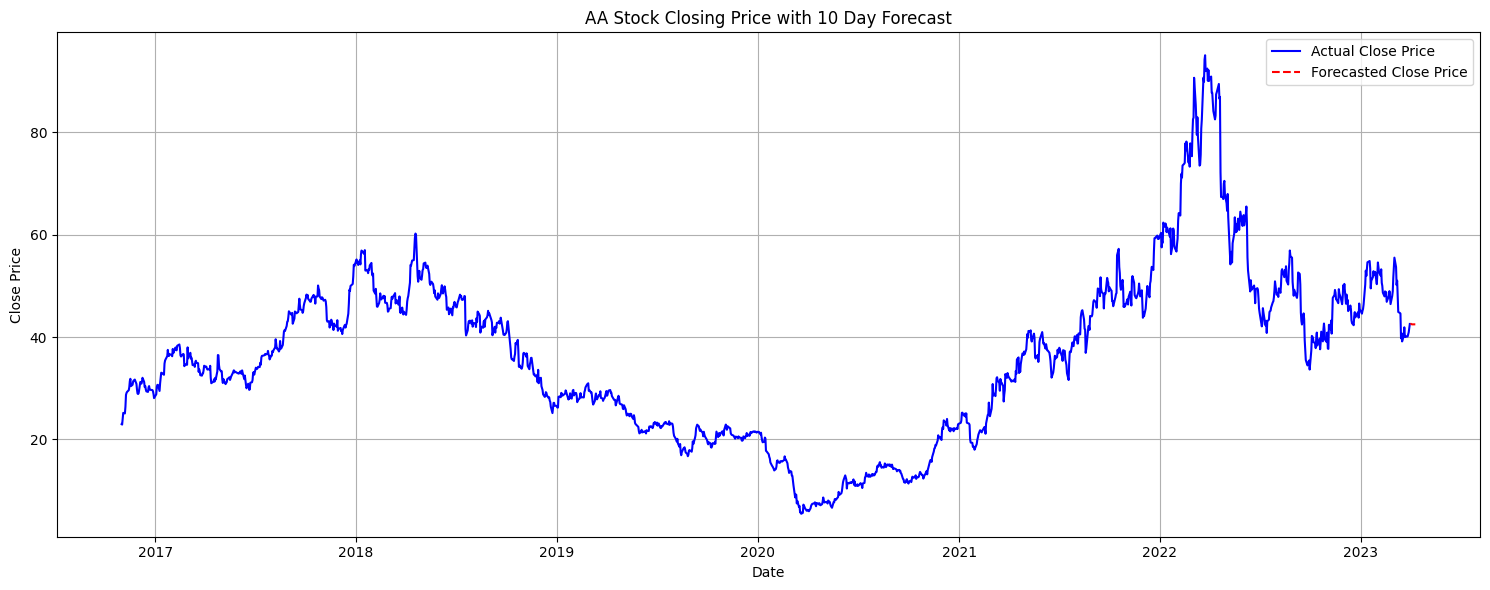

array([42.59044094, 42.58404786, 42.53167213, 42.49573371, 42.48846144,
       42.48832896, 42.49097528, 42.4927982 , 42.49337555, 42.49342866])

In [3]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Fit an ARIMA model
model = ARIMA(df['Close'], order=(5,1,0))
model_fit = model.fit()

# Forecast the next 10 days
forecast = model_fit.forecast(steps=10)
forecast_values = forecast.values

# Generate forecast dates again
forecast_dates = pd.date_range(df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=10)

# Plot the actual and forecasted data
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(forecast_dates, forecast_values, label='Forecasted Close Price', color='red', linestyle='dashed')
plt.title('AA Stock Closing Price with 10 Day Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

forecast_values


In [4]:
# Get the in-sample predictions
in_sample_preds = model_fit.predict(start=1, end=len(df['Close']))

# Calculate the MAE
mae = abs(df['Close'][1:] - in_sample_preds).mean()
mae

0.9102595851164863

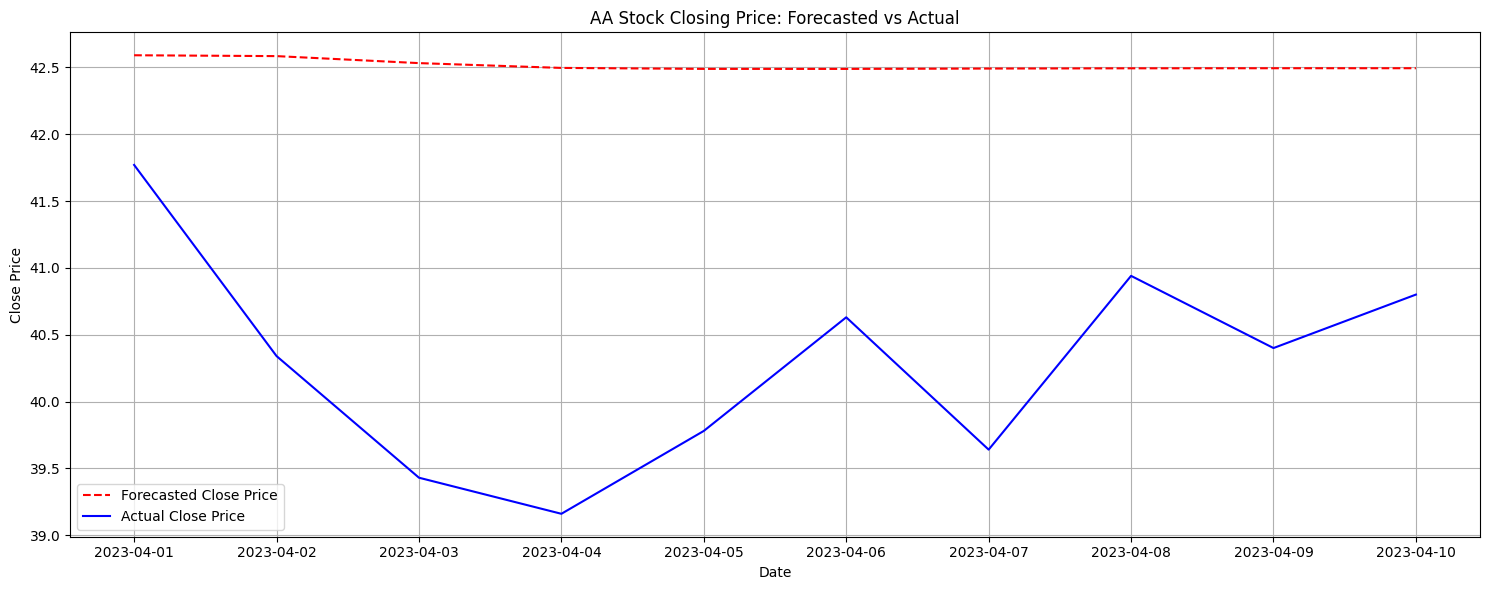

2.225926272798426

In [5]:
# Actual close results for the 10 day period
actual_values = [41.77, 40.34, 39.43, 39.16, 39.78, 40.63, 39.64, 40.94, 40.40, 40.80]

# Calculate the Mean Absolute Error (MAE)
mae_forecast = abs(forecast_values - actual_values).mean()

# Plot the forecasted and actual values
plt.figure(figsize=(15, 6))
plt.plot(forecast_dates, forecast_values, label='Forecasted Close Price', color='red', linestyle='dashed')
plt.plot(forecast_dates, actual_values, label='Actual Close Price', color='blue')
plt.title('AA Stock Closing Price: Forecasted vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mae_forecast

## Multiple Linear Regression Model

Although unlikely to better the ARIMA model, my next request was for the ADA to forecast using multiple linear regression.

**Prompt:** `"using the same dataset, create a multiple linear regression model and use it to forecast the close 1-day after the last row of data"`

**Initial response:**

To create a multiple linear regression model for forecasting, we typically use multiple features or predictors. Given the dataset, we can use features like "Open", "High", "Low", and "Volume" to predict the "Close" price.

Here's the plan:

1. Split the dataset into training and testing sets. We'll use all but the last data point for training and reserve the last data point for testing.
2. Create a multiple linear regression model using the training set.
3. Forecast the "Close" price 1-day after the last row of data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Features and target variable
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Close']

# Split the data: All but the last data point for training, the last data point for testing
X_train, X_test = X[:-1], X.iloc[-1].values.reshape(1, -1)
y_train, y_test = y[:-1], y.iloc[-1]

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the "Close" price 1-day after the last row of data
forecast_close = model.predict(X_test)[0]
forecast_close

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.328881689096185

## LSTM

When I asked Chat GPT to use a LSTM model, it attempted to load the required python necessary to run the code (Keras and TensorFlow). However, it was unavailable to it asked if it could walk me through the steps, which are recreated below.

**Prompt:** `"using the same dataset, create a lstm model and use it to forecast the close 1-day after the last row of data"`

**Initial response:**

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) that is well-suited for time series forecasting. To use an LSTM to forecast the "Close" price:

1. Data Preprocessing: LSTMs expect data to be in a specific format, usually a 3D array. We'll also scale our data to make it more suitable for LSTM training.
2. Model Building: We'll define our LSTM model architecture.
3. Training: We'll train our LSTM model on our dataset.
4. Forecasting: We'll make predictions using our trained model.

It seems that the necessary backend for Keras, which is TensorFlow, is not available in this environment. Therefore, I'm unable to run an LSTM model here.

However, I can guide you through the process or provide the code, which you can execute in an environment that supports TensorFlow and Keras. Would you like to proceed with that approach?

### 1. Data Preprocessing

LSTMs expect the input data to be in a specific 3D shape. We'll also normalize our data to improve the training process.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


### 2. Create a Dataset for LSTM

LSTMs expect the input data in a sequence. We'll use the last 60 days of data to predict the next day's closing price.

In [ ]:
X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


### 3. Build the LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

### 4. Train the LSTM Model

In [ ]:
model.fit(X, y, batch_size=32, epochs=50)

Epoch 1/50
49/49 [==============================] - 11s 61ms/step - loss: 0.0147
Epoch 2/50
49/49 [==============================] - 4s 77ms/step - loss: 0.0015
Epoch 3/50
49/49 [==============================] - 3s 67ms/step - loss: 0.0013
Epoch 4/50
49/49 [==============================] - 3s 59ms/step - loss: 0.0011
Epoch 5/50
49/49 [==============================] - 3s 59ms/step - loss: 0.0011
Epoch 6/50
49/49 [==============================] - 4s 74ms/step - loss: 0.0010
Epoch 7/50
49/49 [==============================] - 3s 68ms/step - loss: 9.6938e-04
Epoch 8/50
49/49 [==============================] - 3s 60ms/step - loss: 8.9201e-04
Epoch 9/50
49/49 [==============================] - 3s 60ms/step - loss: 8.3399e-04
Epoch 10/50
49/49 [==============================] - 3s 69ms/step - loss: 8.6645e-04
Epoch 11/50
49/49 [==============================] - 4s 74ms/step - loss: 8.4523e-04
Epoch 12/50
49/49 [==============================] - 3s 59ms/step - loss: 8.5543e-04
Epoch 13/50


### 5. Forecast the "Close" Price

In [ ]:
test_data = scaled_data[len(scaled_data) - 60:].reshape(-1, 1)
X_test = []
X_test.append(test_data)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_close = model.predict(X_test)
predicted_close = scaler.inverse_transform(predicted_close)  # Convert back from scaled values
print(predicted_close[0][0])


1/1 [==============================] - 2s 2s/step
42.62578


You can run the above code in your local machine or any cloud environment that supports TensorFlow and Keras. This will provide you with the forecasted "Close" price for 1-day after the last row of data.

Please note: The provided LSTM architecture and hyperparameters are basic and serve as a starting point. You might want to tweak the number of units, layers, epochs, batch size, etc., based on the dataset's characteristics and performance requirements.

## Autoregression

**Prompt:** `"using the same dataset, create a Autoregression (AR) model and use it to forecast the close 1-day after the last row of data."`

**Initial Response**

Autoregression (AR) is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

Let's proceed with creating an AR model and forecasting the "Close" price for 1-day after the last row of data:

In [6]:
from statsmodels.tsa.ar_model import AutoReg

# Define the dataset
data = df['Close'].values

# Fit an AutoReg model
lag = 30  # you can adjust this based on your data characteristics
model_ar = AutoReg(data, lags=lag)
model_ar_fit = model_ar.fit()

# Forecast the "Close" price 1-day after the last row of data
forecast_ar = model_ar_fit.predict(start=len(data), end=len(data))
forecast_ar[0]


42.43317227460394

## Moving Average

**Prompt:** `"using the same dataset, create a Moving Average (MA) model and use it to forecast the close 1-day after the last row of data`"

**Initial Reponse:**

A Moving Average (MA) model is another method used in time series forecasting. However, in statistical time series analysis, the "moving average model" refers to a theoretical component of the ARIMA family, where errors (or shocks) are modeled to be dependent on previous errors. This is different from the more common notion of "moving averages" where we take an average of previous values.

For forecasting purposes, the theoretical MA model isn't usually used on its own but rather in combination with autoregressive (AR) models to form ARMA or ARIMA models.

If you're looking for a prediction based on a simple moving average of previous values (like taking the average of the past 'n' days), please clarify the number of days you'd like to consider for this average. Otherwise, I'll proceed with the ARIMA model using only the MA component.

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Determine the order of differencing (d) to make the series stationary
# We'll use the ADF test and start with d=1
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'].diff().dropna())

# If the p-value is less than 0.05, the series is stationary, else we might need to increase d
d = 1 if result[1] < 0.05 else 2

# For simplicity, we'll start with q=1 for the MA component
q = 1

# Fit the ARIMA model
model_ma = ARIMA(df['Close'], order=(0,d,q))
model_ma_fit = model_ma.fit()

# Forecast the "Close" price 1-day after the last row of data
forecast_ma = model_ma_fit.forecast(steps=1).values[0]
forecast_ma


42.58331358213584

## Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

**Prompt:** `"using the same dataset, create a Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) model and use it to forecast the close 1-day after the last row of data"`

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Exogenous features
exog = df[['Open', 'High', 'Low', 'Volume']]

# Define the SARIMAX model
model_sarimax = SARIMAX(df['Close'], exog=exog, order=(1,1,1), seasonal_order=(1,1,1,12))
model_sarimax_fit = model_sarimax.fit(disp=False)

# Forecast the "Close" price 1-day after the last row of data, using the last row's exogenous features
exog_forecast = df[['Open', 'High', 'Low', 'Volume']].iloc[-1:].values
forecast_sarimax = model_sarimax_fit.forecast(steps=1, exog=exog_forecast).values[0]
forecast_sarimax


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


41.92813127931075

In [ ]:
# Calculate the MAE for the SARIMAX model based on the actual values
mae_sarimax = abs(forecast_sarimax_10days - actual_values).mean()
mae_sarimax

# Calculate in-sample predictions using the SARIMAX model
in_sample_preds_sarimax = model_sarimax_fit.predict(start=lag, end=len(df['Close'])-1, dynamic=False, exog=exog[lag:])

# Calculate the in-sample MAE for the SARIMAX model
mae_in_sample_sarimax = abs(in_sample_preds_sarimax - df['Close'][lag:]).mean()
mae_in_sample_sarimax


## Prophet

Here's a step-by-step guide and the corresponding code to implement the Prophet time series forecasting model for the "AA" stock dataset:

### 1. Install Prophet:

To use Prophet, you'll first need to install it. You can do this via pip.

If you're using a Jupyter Notebook, you can prefix the command with an exclamation mark `(!pip install fbprophet)`.

In [ ]:
!pip install prophet

### 2. Import Necessary Libraries:

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


### 3. Load and Prepare the Data:

Load the dataset and rename the columns to 'ds' (for date) and 'y' (for the variable to predict, in this case, the "Close" price):

In [5]:
#df_prophet = pd.read_csv('PATH_TO_YOUR_FILE.csv')
df_prophet = pd.read_csv('/content/AA_D.csv')
df_prophet = df_prophet[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']


### 4. Initialize and Fit the Prophet Model:

In [ ]:
model_prophet = Prophet(daily_seasonality=True)
model_prophet.fit(df_prophet)


### 5. Forecast the "Close" Price for the Next 10 Days:

In [7]:
future = model_prophet.make_future_dataframe(periods=10)
forecast = model_prophet.predict(future)


### 6. Plot the Results:

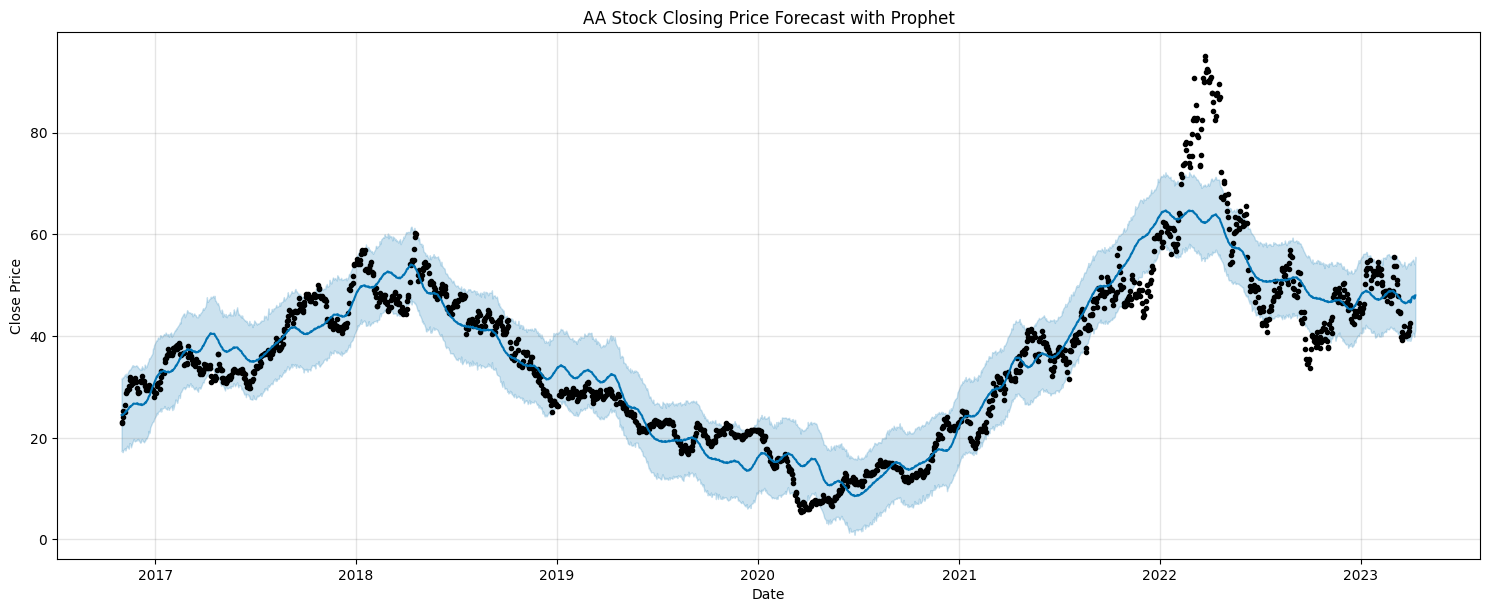

1614    46.568021
1615    46.691262
1616    47.342064
1617    47.591903
1618    47.718926
1619    47.632134
1620    47.814846
1621    47.347354
1622    47.413905
1623    47.986952
Name: yhat, dtype: float64


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-11-01,23.585622,17.349910,31.684261,23.585622,23.585622,0.873548,0.873548,0.873548,3.269045,...,0.244825,0.244825,0.244825,-2.640323,-2.640323,-2.640323,0.0,0.0,0.0,24.459169
1,2016-11-02,23.633672,17.547498,31.554270,23.633672,23.633672,0.905131,0.905131,0.905131,3.269045,...,0.254203,0.254203,0.254203,-2.618117,-2.618117,-2.618117,0.0,0.0,0.0,24.538804
2,2016-11-03,23.681723,17.153445,31.902249,23.681723,23.681723,0.738039,0.738039,0.738039,3.269045,...,0.057978,0.057978,0.057978,-2.588984,-2.588984,-2.588984,0.0,0.0,0.0,24.419762
3,2016-11-04,23.729774,17.542046,31.797898,23.729774,23.729774,0.859074,0.859074,0.859074,3.269045,...,0.142599,0.142599,0.142599,-2.552570,-2.552570,-2.552570,0.0,0.0,0.0,24.588848
4,2016-11-07,23.873925,17.948684,32.403282,23.873925,23.873925,0.987262,0.987262,0.987262,3.269045,...,0.117656,0.117656,0.117656,-2.399440,-2.399440,-2.399440,0.0,0.0,0.0,24.861187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,2023-04-06,39.245438,40.647725,55.048863,39.245438,39.245438,8.386696,8.386696,8.386696,3.269045,...,0.057978,0.057978,0.057978,5.059673,5.059673,5.059673,0.0,0.0,0.0,47.632134
1620,2023-04-07,39.202223,40.398421,54.608795,39.202223,39.202223,8.612623,8.612623,8.612623,3.269045,...,0.142599,0.142599,0.142599,5.200979,5.200979,5.200979,0.0,0.0,0.0,47.814846
1621,2023-04-08,39.159009,39.843123,54.349091,39.159009,39.159009,8.188345,8.188345,8.188345,3.269045,...,-0.408631,-0.408631,-0.408631,5.327931,5.327931,5.327931,0.0,0.0,0.0,47.347354
1622,2023-04-09,39.115795,40.618489,54.092657,39.115795,39.115795,8.298110,8.298110,8.298110,3.269045,...,-0.408630,-0.408630,-0.408630,5.437695,5.437695,5.437695,0.0,0.0,0.0,47.413905


In [11]:
fig = model_prophet.plot(forecast, figsize=(15, 6))
plt.title('AA Stock Closing Price Forecast with Prophet')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.show()

# Extract the last 10 rows of the 'yhat' column from the forecast dataframe
forecast_values = forecast['yhat'].tail(10)

# Print the 10-day forecast
print(forecast_values)

forecast